In [43]:
#Import modules
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot
from datetime import datetime, date, timedelta
from matplotlib.pyplot import figure  
import numpy as np
import math

In [44]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment1/Ruter_data.csv'

In [45]:
df = pd.read_csv(url, sep=';')
df.head(5)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [46]:
####Converts str to time, replace hours over 24 with hours under 24
#### changeDate is set to True, the date change with the change of time (use it for first run only)
####Converts str to time, replace hours over 24 with hours under 24
#### changeDate is set to True, the date change with the change of time (use it for first run only)
def strToTime(rowName, changeDate=False):
    x=rowName                               #Name of the row evaluated
    for i, row in df.iterrows():            #df.iterrows() is the buildt in iter from pandas, haven't read documentation, too tierd right now
        hourStr = row[x][:2]
        try:                                #Convert string to int. If value error (ie not a number)
            hourInt = int(hourStr)
        except ValueError:
            df.drop(i, inplace=True)        #Remove the item from the list
        except:
            print("error")                  #For debugging only
            
        if hourInt>23:                                   ##Checks if %H is < 23            
            try:              
                hourInt = hourInt - 24                      #And subtracts 24h
                hourStr = str("%02d" % hourInt) + ":"       #Formats to 2-digit format
                df.at[i,x] = hourStr+row[x][3:]             #Inserts back into string
                
                if changeDate:
                    df.at[i,"Dato"]=row["Dato"] +  timedelta(days=1) #Adds one day to date where time has changed above             

            except:                                #Error msg if it fails!
                print("Error on converting:")
                print(df.iloc[i])

    
    df[x] = pd.to_datetime(df[x],format= '%H:%M:%S' ).dt.time  #Change from string to date time object
  # df[x] = pd.to_datetime(df['Date'] + " " +df[x])
    print("done with " + x)                                       #The loop take some time, so just provideing som feedback


In [47]:
df['Dato'] = pd.to_datetime(df['Dato'])                #Convert date to a datetime object
strToTime('Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', changeDate = True)  #Convert time to a datetime object, change date when time is over 24:00:00
strToTime('Tidspunkt_Faktisk_Avgang_Holdeplass_Fra')         #Change time to datetime, no need for future date change
strToTime('Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')
strToTime('Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')

done with Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra
done with Tidspunkt_Faktisk_Avgang_Holdeplass_Fra
done with Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra
done with Tidspunkt_Planlagt_Avgang_Holdeplass_Fra


In [50]:
df = df.rename(columns={"Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra":"Faktisk_Ankomst", "Tidspunkt_Faktisk_Avgang_Holdeplass_Fra":"Faktisk_Avgang", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra":"Planlagt_Ankomst", "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra":"Planlagt_Avgang", "Passasjerer_Ombord":"Passasjerer_Flux"})

In [51]:
#df.iloc[245]
df.head(5)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TurId               5949 non-null   object        
 1   Dato                5949 non-null   datetime64[ns]
 2   Fylke               5949 non-null   object        
 3   Område              5949 non-null   object        
 4   Kommune             5949 non-null   object        
 5   Holdeplass_Fra      5949 non-null   object        
 6   Holdeplass_Til      5949 non-null   object        
 7   Linjetype           5949 non-null   object        
 8   Linjefylke          5949 non-null   object        
 9   Linjenavn           5949 non-null   object        
 10  Linjeretning        5949 non-null   int64         
 11  Faktisk_Ankomst     5949 non-null   object        
 12  Faktisk_Avgang      5949 non-null   object        
 13  Planlagt_Ankomst    5949 non-null   object      

In [53]:
print("Feature 1: time spent at the stop")
df['Time_At_Stop'] = df.apply(lambda row: datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Avgang) - datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Ankomst), axis = 1)
#Subtract Faktisk Avgang with Faktisk Ankomst to find time spent at the stop. (Datetime(1,1,1,0,0,0) is a dummy placeholder to be able to subtract.)

Feature 1: time spent at the stop


In [54]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,00:00:06
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,00:00:06
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,00:00:25
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,00:00:22
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,00:00:40


In [55]:
df['Ukedag'] = df['Dato'].dt.day_name()

In [56]:
print("Feature 2: arrival delay")
df['Forsinkelse'] = df.apply(lambda row: datetime.combine(datetime(1,1,1,0,0,0), row.Faktisk_Ankomst) - datetime.combine(datetime(1,1,1,0,0,0), row.Planlagt_Ankomst), axis = 1)
df.iloc[245]
# Subtract Faktisk Avgang with Planlagt Avgang to find the delay/anticipation in departure. (Datetime(1,1,1,0,0,0) is a dummy placeholder to be able to subtract.)

Feature 2: arrival delay


TurId                        30001-2020-06-26T14:35:00+02:00
Dato                                     2020-06-26 00:00:00
Fylke                                                  Viken
Område                                               Nordøst
Kommune                                           Lillestrøm
Holdeplass_Fra                               Jonas Lies gate
Holdeplass_Til        Lillestrøm bussterminal (Plattform 18)
Linjetype                                              Lokal
Linjefylke                                             Viken
Linjenavn                                                110
Linjeretning                                               1
Faktisk_Ankomst                                     15:27:32
Faktisk_Avgang                                      15:27:39
Planlagt_Ankomst                                    15:24:00
Planlagt_Avgang                                     15:24:00
Kjøretøy_Kapasitet                                       106
Passasjerer_Flux        

Text(0.5, 1.0, 'Stop Time Based on day of the week')

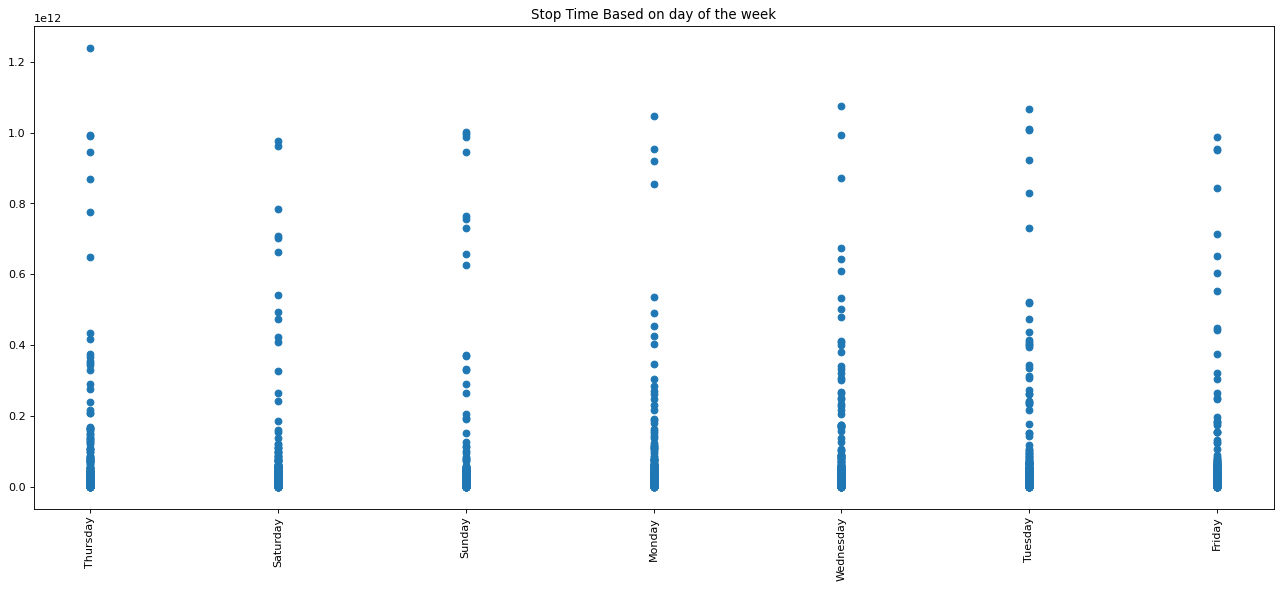

In [57]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df['Ukedag'], df['Time_At_Stop'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='vertical')
plot.title('Stop Time Based on day of the week')

In [58]:
df["Time_At_Stop"].mean()

Timedelta('0 days 00:00:29.630526')

In [59]:
df[df['Time_At_Stop']==df['Time_At_Stop'].max()]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse
568,45509-2020-08-20T17:48:00+02:00,2020-08-20,Viken,Nordøst,Lillestrøm,Rånåsfoss stasjon (buss),Sandnesvegen,Lokal,Viken,455,1,17:33:01,17:53:41,17:48:00,17:48:00,80,0,00:20:40,Thursday,-1 days +23:45:01


In [60]:

#df.drop([491], inplace=True) 

In [61]:
df[df['Forsinkelse']==df['Forsinkelse'].max()]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse
491,55011-2020-07-25T23:30:00+02:00,2020-07-25,Viken,Nordøst,Rælingen,Nordby skole,Skjønberg,Lokal,Viken,350,1,23:58:21,23:58:23,00:01:00,00:01:00,80,10,00:00:02,Saturday,23:57:21


Text(0.5, 1.0, 'Forsinkelse')

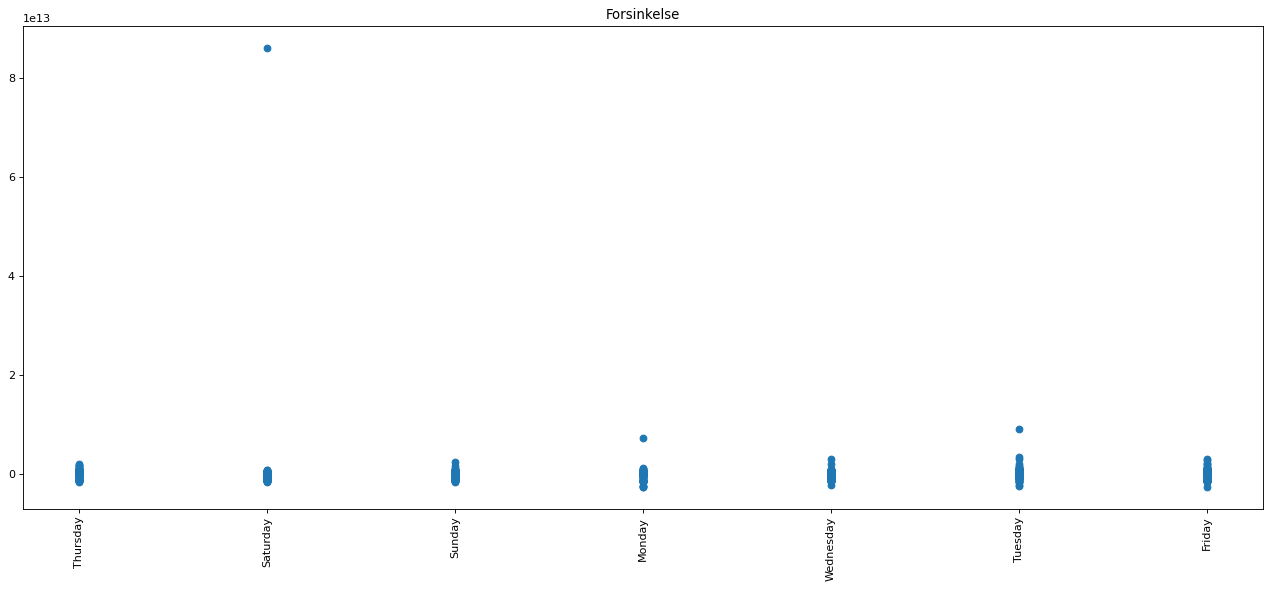

In [62]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df['Ukedag'], df['Forsinkelse'], 'o')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='vertical')
plot.title('Forsinkelse')

In [63]:
lower_limit, upper_limit = df.Forsinkelse.quantile([0.01,0.99])
lower_limit, upper_limit

(Timedelta('-1 days +23:37:26'), Timedelta('0 days 00:14:23.759999'))

In [64]:
df.shape

(5949, 20)

In [65]:
df2 = df[(df.Forsinkelse>lower_limit)&(df.Forsinkelse<upper_limit)]
df2.shape

(5829, 20)

Text(0.5, 1.0, 'Forsinkelse')

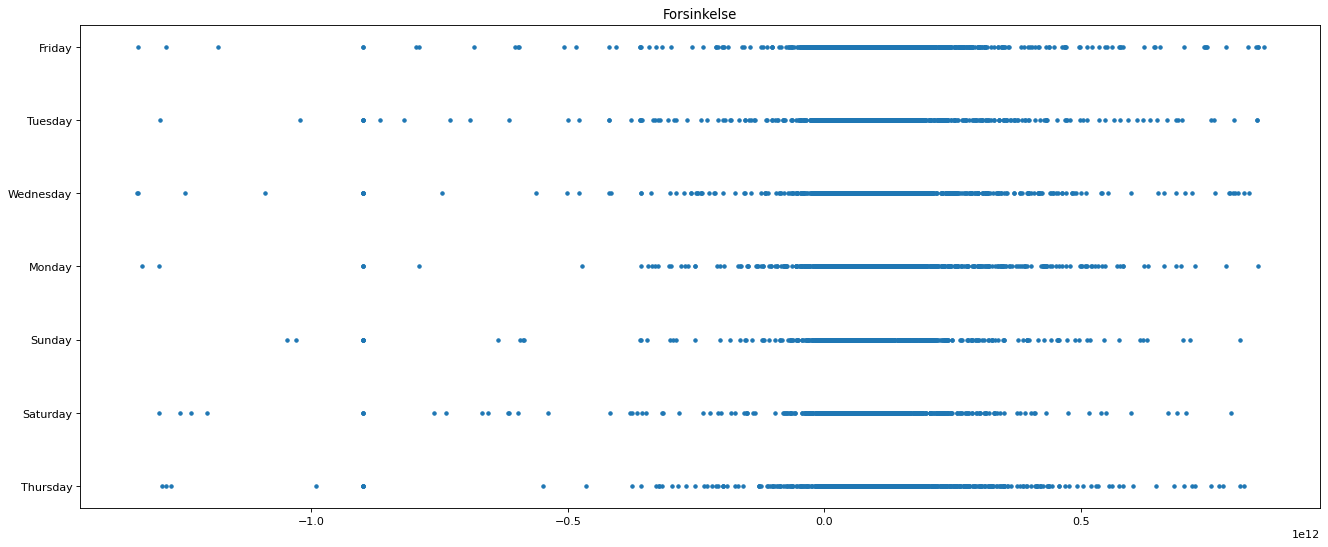

In [66]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plotdf = df.sort_values('Dato', ascending=True)                             #Sorting dates (dont know if this is needed)
plot.plot(df2['Forsinkelse'], df2['Ukedag'], '.')                      #Plotting Stoptime with date, 'o' - gives scatter plot
plot.xticks(rotation='horizontal')
plot.title('Forsinkelse')

-1341.0
2198.0


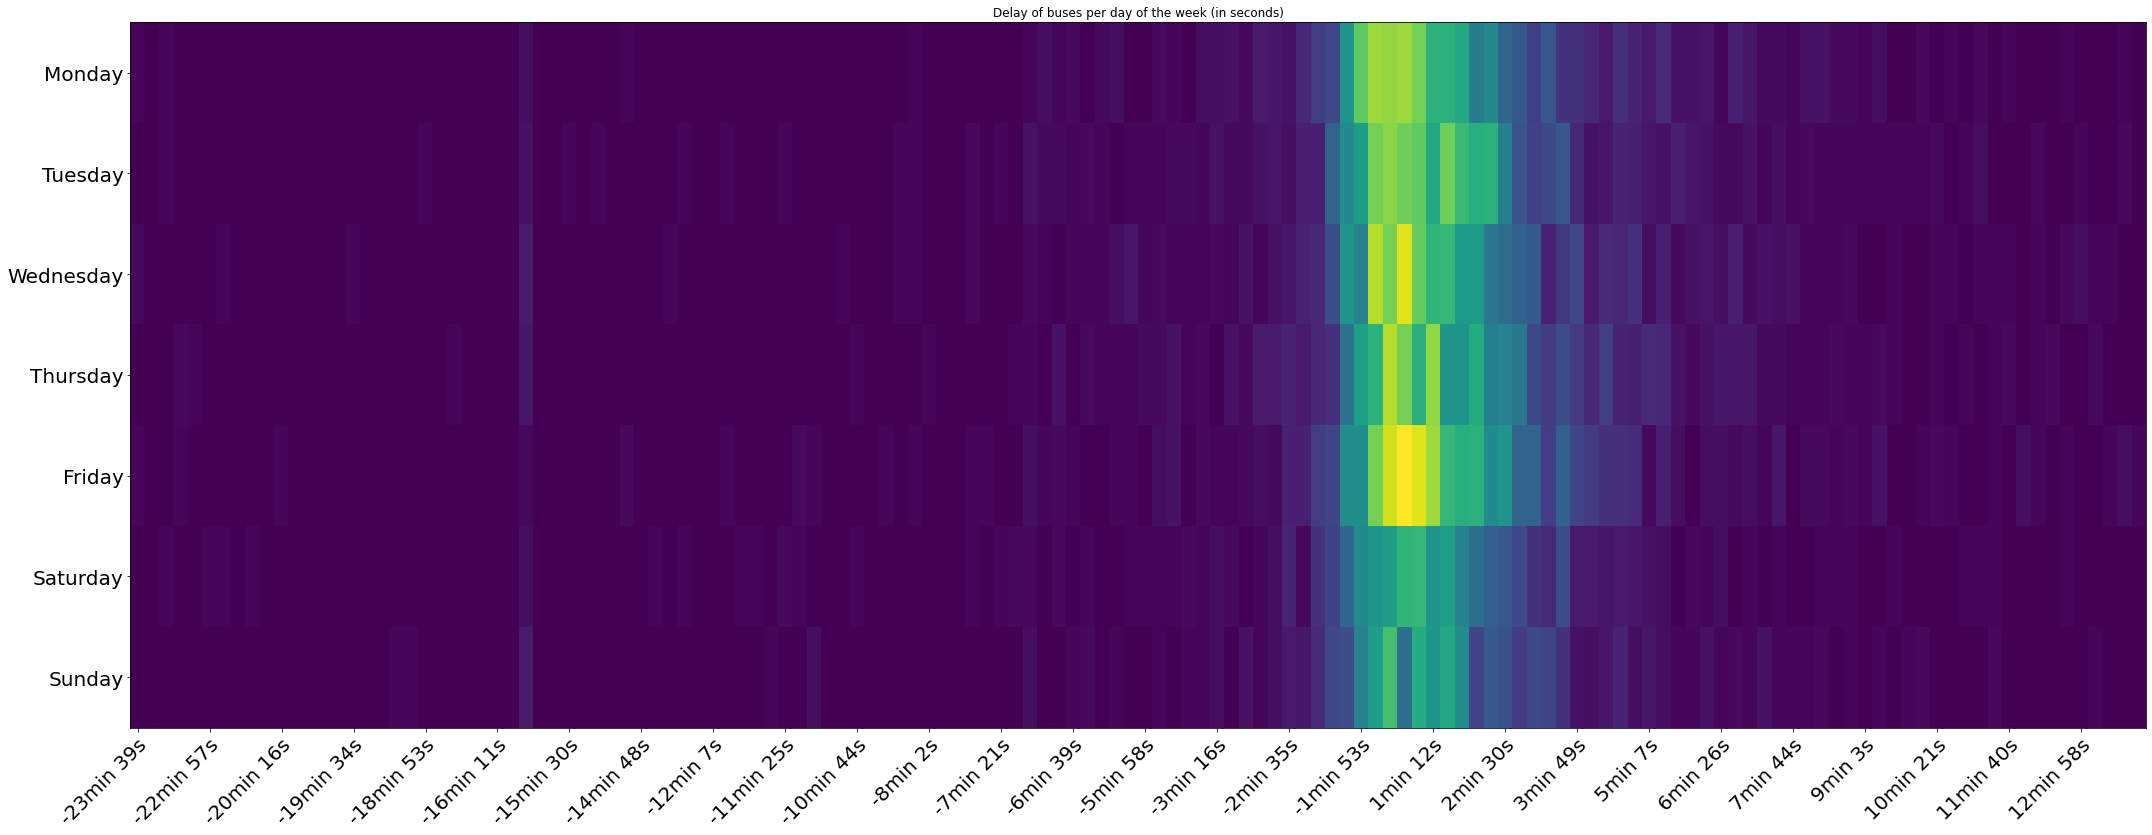

In [106]:
def countDelays(rowNameY, rowNameX):

    minDelay = df2[rowNameX].min().total_seconds()
    maxDelay = df2[rowNameX].max().total_seconds() - minDelay
    print(minDelay)
    print(maxDelay)
    
    bins = 140
    grid = np.zeros((7, bins))
    nrTicks = 28
    ticks = [None] * nrTicks
    
    i=0
    while i<nrTicks:
        totalSecs = minDelay + (i*(maxDelay/nrTicks))
        minutes, seconds = divmod(totalSecs, 60)
        minutes = int(minutes)
        seconds = int(seconds)
        ticks[i] = str(minutes)+"min "+str(seconds)+"s"
        i = i+1
        
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    
    for j, row in df2.iterrows():
        day = row[rowNameY]
        delay = row[rowNameX].total_seconds() - minDelay
        toBin = math.floor(delay/maxDelay*(bins-1))
        
        dayNr=-1
        
        k=0
        while k<7:
            if day==days[k]:
                dayNr=k
            k=k+1
        
        if(dayNr != -1):
            grid[dayNr, toBin] = grid[dayNr, toBin] + 1

    fig, ax = plot.subplots(figsize=(30, 30))
    im = ax.imshow(grid)
    ax.set_aspect(7)

    # Setting up ticks
    ax.set_xticks(np.arange(len(ticks)))
    plot.xticks(np.arange(0, 140, step=5))
    ax.set_xticklabels(ticks)
    ax.set_yticks(np.arange(len(days)))
    ax.set_yticklabels(days)
    ax.tick_params(axis='both', labelsize=20)
    plot.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    ax.set_title("Delay of buses per day of the week (in seconds)")
    fig.tight_layout()
    plot.show()

countDelays('Ukedag', 'Forsinkelse')

In [68]:
df = df.sort_values('Dato', ascending=True)

Text(0, 0.5, 'Count')

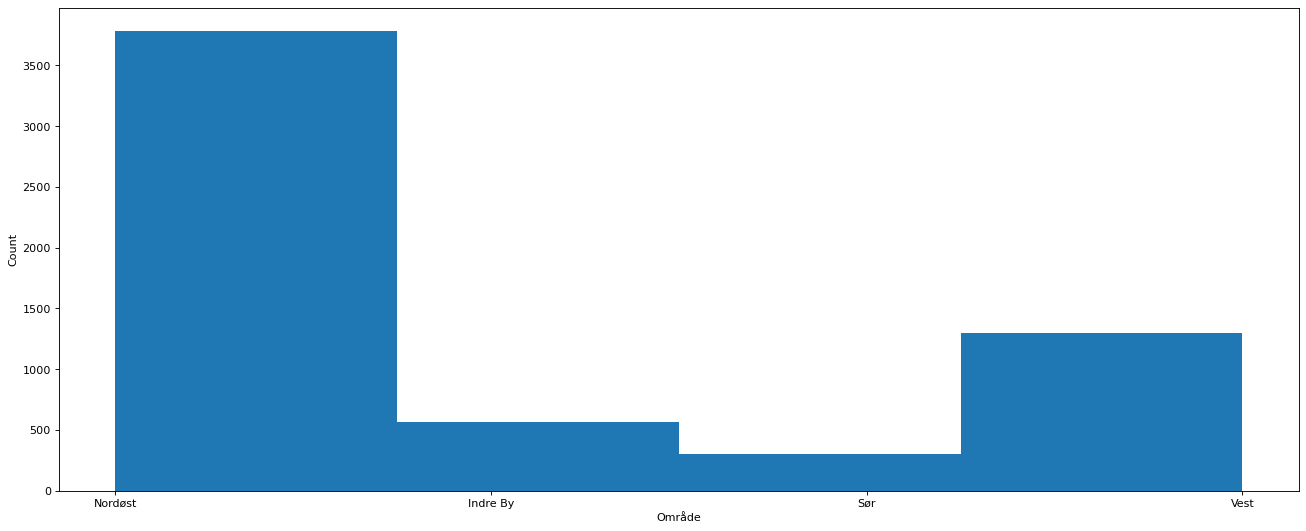

In [69]:
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')  #Set the size of plot
plot.hist(df.Område, bins=4, rwidth=1)
plot.xlabel('Område')
plot.ylabel('Count')

In [70]:
# Average time at the stop per område


x = "Time_At_Stop"                                                                 #The col that will be converted
df = df.sort_values('Dato', ascending=True)
df['Time_At_Stop_Float'] = df.apply(lambda row: row[x].total_seconds(), axis = 1)  #Converting datetime to float
timePrStopArea=df[['Område', 'Time_At_Stop_Float']].groupby(['Område']).mean()     #Grouping by area and taking the mean of stop time
timePrStopWeekday=df[['Ukedag', 'Time_At_Stop_Float']].groupby(['Ukedag']).mean()  #Grouping by weekday and taking the mean of stop time

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Faktisk_Ankomst,Faktisk_Avgang,Planlagt_Ankomst,Planlagt_Avgang,Kjøretøy_Kapasitet,Passasjerer_Flux,Time_At_Stop,Ukedag,Forsinkelse,Time_At_Stop_Float
5093,12009-2020-06-01T14:28:00+02:00,2020-01-06,Oslo,Nordøst,Stovner,Øvre Fossum (mot Stovner T),Stovner T (i Fossumveien),Lokal,Viken,120,...,14:53:21,14:53:55,14:52:00,14:52:00,72,7,00:00:34,Monday,00:01:21,34.0
657,3105-2020-06-01T07:42:00+02:00,2020-01-06,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,08:38:34,08:38:58,08:37:00,08:37:00,151,0,00:00:24,Monday,00:01:34,24.0
5783,3102-2020-06-01T21:36:00+02:00,2020-01-06,Oslo,Indre By,Sentrum,Wessels plass (mot Jernbanetorget),Kvadraturen (mot øst),Lokal,Oslo,31,...,22:01:12,22:01:43,22:01:00,22:01:00,151,15,00:00:31,Monday,00:00:12,31.0
2247,42501-2020-06-01T04:08:00+02:00,2020-01-06,Viken,Nordøst,Ullensaker,Averstadmoen,Skinnerudvegen,Lokal,Viken,425,...,04:19:16,04:19:18,04:19:00,04:19:00,80,0,00:00:02,Monday,00:00:16,2.0
4278,47004-2020-06-01T17:30:00+02:00,2020-01-06,Viken,Nordøst,Lillestrøm,Nygårdstoppen,Øvre Dalen,Lokal,Viken,480,...,17:54:51,17:54:57,17:52:00,17:52:00,106,14,00:00:06,Monday,00:02:51,6.0


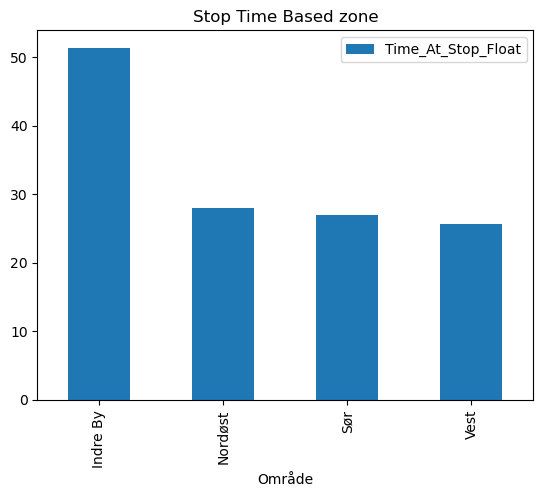

In [71]:
with plot.style.context('default'):  #Using the default plot theme

    timePrStopArea.plot.bar()                     #Barplot of the dataframe
    plot.rcParams["figure.figsize"] = [10, 8]     #Setting size
    plot.xticks(rotation='vertical')
    plot.title('Stop Time Based zone')            

In [72]:
timePrStopWeekday.head()

,Time_At_Stop_Float
Ukedag,
Friday,26.238424
Monday,27.356833
Saturday,30.384498
Sunday,32.275753
Thursday,30.045708


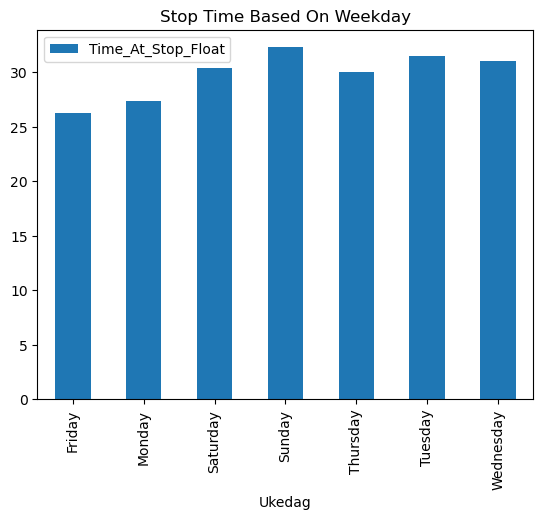

In [73]:
with plot.style.context('default'):

    timePrStopWeekday.plot.bar()
    plot.rcParams["figure.figsize"] = [10, 8]
    plot.xticks(rotation='vertical')
    plot.title('Stop Time Based On Weekday')